In [1]:
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
#写入甲的数据

jia = np.array([[11,18,15,18,15],[33,27,31,21,17],
                [20,28,27,23,19],[18,26,18,18,9],
                [22,23,22,16,10],[20.8,24.4,22.6,19.2,14.0]])
jia_data = pd.DataFrame(jia,columns=['I1','I2','I3','I4','I5'],
                        index=['1','2','3','4','5','Mean'])
jia_data

,I1,I2,I3,I4,I5
1,11.0,18.0,15.0,18.0,15.0
2,33.0,27.0,31.0,21.0,17.0
3,20.0,28.0,27.0,23.0,19.0
4,18.0,26.0,18.0,18.0,9.0
5,22.0,23.0,22.0,16.0,10.0
Mean,20.8,24.4,22.6,19.2,14.0


In [3]:
#写入乙的数据

yi = np.array([[18,17,20,18,18],[31,24,31,26,20],
              [14,16,17,20,17],[25,24,31,26,28],
              [36,28,24,26,29],[24.8,21.8,24.6,23.2,20.4]])
yi_data = pd.DataFrame(yi,columns=['I1','I2','I3','I4','I5'],
                        index=['1','2','3','4','5','Mean'])
yi_data

,I1,I2,I3,I4,I5
1,18.0,17.0,20.0,18.0,18.0
2,31.0,24.0,31.0,26.0,20.0
3,14.0,16.0,17.0,20.0,17.0
4,25.0,24.0,31.0,26.0,28.0
5,36.0,28.0,24.0,26.0,29.0
Mean,24.8,21.8,24.6,23.2,20.4


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


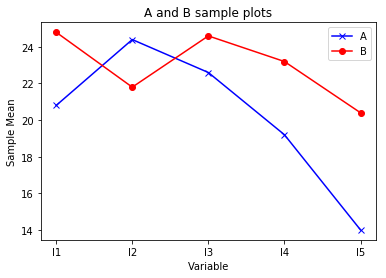

In [4]:
# 画出轮廓分析图

plt.figure()
plt.plot(jia_data.ix['Mean'],marker='x',color='b',label='A')
plt.plot(yi_data.ix['Mean'],marker='o',color='r',label='B')
plt.ylabel('Sample Mean')
plt.xlabel('Variable')
plt.title('A and B sample plots')
plt.legend(loc='best')
plt.show()

In [5]:
# 设置相应参数
n1 = 5
n2 = 5
k = 4

C = np.array([[1,-1,0,0,0],[0,1,-1,0,0],
              [0,0,1,-1,0],[0,0,0,1,-1]])
C = pd.DataFrame(C)

In [6]:
#计算样本均值之差

M = jia_data.ix['Mean'] - yi_data.ix['Mean']
M

I1   -4.0
I2    2.6
I3   -2.0
I4   -4.0
I5   -6.4
Name: Mean, dtype: float64

In [7]:
# 计算联合协方差

S1 = jia_data.iloc[0:5,:].cov()
S2 = yi_data.iloc[0:5,:].cov()
Sp = ((n1-1)*S1+(n2-1)*S2) / (n1+n2-2)
Sp

,I1,I2,I3,I4,I5
I1,72.700,33.025,41.65,18.675,22.550
I2,33.025,21.250,21.30,12.725,14.675
I3,41.650,21.300,41.30,16.350,17.850
I4,18.675,12.725,16.35,11.450,13.700
I5,22.550,14.675,17.85,13.700,25.650


In [8]:
# 计算C(X_ba_jia - X_ba_yi)

A = np.array(C) @ np.array(M)
A

array([-6.6,  4.6,  2. ,  2.4])

In [9]:
# 计算CSpC'

B = np.array(C) @ np.array(Sp) @ np.array(C).T 
B

array([[ 27.9  ,  -8.575,  14.4  ,  -1.925],
       [ -8.575,  19.95 , -16.375,  -0.45 ],
       [ 14.4  , -16.375,  20.05 ,   0.75 ],
       [ -1.925,  -0.45 ,   0.75 ,   9.7  ]])

In [10]:
# 对上一步求逆

D = np.linalg.inv(B)
D

array([[ 0.06516278, -0.03198824, -0.07356626,  0.01713591],
       [-0.03198824,  0.16782494,  0.16044839, -0.01096829],
       [-0.07356626,  0.16044839,  0.23469693, -0.02530268],
       [ 0.01713591, -0.01096829, -0.02530268,  0.10794102]])

In [11]:
#计算霍特林统计量

T2 = ((n1*n2)/(n1+n2)) * np.array(M).T @ np.array(C).T @ D @ A
T2

34.397422096273075

In [12]:
# 计算相应的F统计量

F = (n1+n2-k-1)/(k*(n1+n2-2)) * T2
F

5.3745972025426685

In [13]:
#计算相应的p值

from scipy.stats import f
p_value = f.sf(F,k,n1)
p_value

0.046835093793707996